In [174]:
import numpy as np
%matplotlib inline
fpath='D:/4_muonSR/data_plot/dynNKZF_5Ts.dat'
data = np.genfromtxt(fpath, dtype=None, skip_header=1,delimiter=",")
#data = data[~np.isnan(data)]
print data
print data[:,1]


[[  1.20117000e-02   2.62619000e-01   4.68143000e-03 ...,   2.39993000e-01
    2.05078000e-03   2.39994000e-01]
 [  2.37305000e-02   2.45778000e-01   4.70304000e-03 ...,   2.39989000e-01
    2.63672000e-03   2.39991000e-01]
 [  3.54492000e-02   2.40585000e-01   4.74705000e-03 ...,   2.39985000e-01
    3.22266000e-03   2.39987000e-01]
 ..., 
 [             nan              nan              nan ...,   3.70784000e-02
    5.99678000e+00   4.04325000e-02]
 [             nan              nan              nan ...,   3.70774000e-02
    5.99736000e+00   4.04310000e-02]
 [             nan              nan              nan ...,   3.70764000e-02
    5.99795000e+00   4.04294000e-02]]
[ 0.262619  0.245778  0.240585 ...,       nan       nan       nan]


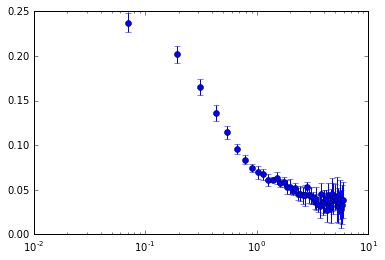

In [99]:
# Good good but not better than using histagram()
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
#plt.plot(data[:,0],data[:,1])
#plt.errorbar(data[:,0],data[:,1], data[:,2])

def packing(x,y,packpts):
    x = x[~np.isnan(x)] # remove nan from the data
    y = y[~np.isnan(y)]
    n=np.int(x.size/packpts) # No of new data points
    newx=np.zeros(n)
    newy=np.zeros(n)
    newye=np.zeros(n)
    half=np.int(packpts/2) # packing half radius
    #print half
    newindex=[half+i*packpts for i in xrange(0,n)]
    newx=x[newindex]
    for i in xrange(0,n):
        newy[i]=np.mean(y[xrange(i*packpts,(i+1)*packpts)])
        newye[i] =np.std(y[xrange(i*packpts,(i+1)*packpts)])
    return newx,newy,newye
#newdata=packing(data[:,0],data[:,1],1)

#print newdata
#print newdata[0]
#plt.errorbar(newdata[0],newdata[1], newdata[2],fmt='o')
#plt.xscale('log')

def lin_binning(x,y,nbins): #input: data x,y ; No of points you want nbins  
    x = x[~np.isnan(x)] # remove nan from the data
    y = y[~np.isnan(y)]
    n, _ = np.histogram(x, bins=nbins) # n=len(x)/nbins
    meanx= np.histogram(x, bins=nbins, weights=x)[0] / n
    meany= np.histogram(x, bins=nbins, weights=y) [0]/ n
    meany2= np.histogram(x, bins=nbins, weights=y*y)[0] / n
    std_y = np.sqrt(meany2 - meany*meany)
    return meanx,meany,std_y #the reulst is one row with 3 row arrays

newdata=lin_binning(data[:,0],data[:,1],50)
plt.errorbar(newdata[0],newdata[1], newdata[2],fmt='o')
plt.xscale('log')


# This function takes an array of numbers and smoothes them out.  
# Smoothing is useful for making plots a little easier to read.  
def sliding_mean(data_array, window=5):  
    data_array = array(data_array)  
    new_list = []  
    for i in range(len(data_array)):  
        indices = range(max(i - window + 1, 0),  
                        min(i + window + 1, len(data_array)))  
        avg = 0  
        for j in indices:  
            avg += data_array[j]  
        avg /= float(len(indices))  
        new_list.append(avg)  
          
    return array(new_list)  

In [22]:
print np.ones(10)
np.convolve([1,2,3],[0.2,0.2,0.2,0.2,0.2], 'same')
newindex=[1+i*2 for i in xrange(0,4)]
print newindex

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
[1, 3, 5, 7]


[63, 43, 17, 76, 85, 17, 16, 28, 75, 33, 21, 34, 50, 40, 40, 22, 30, 13, 39, 17, 43, 13, 13, 15, 6, 17, 22, 14, 22, 30, 8, 9, 22, 12, 13, 10, 11, 9, 20, 8, 11, 7, 13, 24, 6, 9, 14, 17, 8, 32, 9, 9, 12, 5, 8, 4, 22, 12, 6, 15, 19, 14, 16, 25, 10, 4, 10, 13, 16, 5, 15, 10, 7, 23, 7, 7, 5, 11, 8, 6, 9, 16, 7, 16, 9, 12, 5, 8, 13, 30, 6, 9, 6, 4, 10, 11, 15, 6, 6, 8, 10, 6, 9, 6, 9, 11, 4, 5, 12, 11, 24, 7, 10, 15, 5, 11, 10, 8, 5, 12, 3, 7, 20, 8, 10, 14, 3, 4, 6, 6, 11, 12, 3, 6, 6, 15, 13, 10, 5, 8, 4, 15, 8, 6, 5, 4, 13, 8, 7, 6, 3, 3, 9, 3, 4, 6, 9, 6, 6, 7, 9, 4, 3, 11, 13, 5, 5, 8, 12, 7, 9, 4, 5, 11, 7, 3, 12, 8, 5, 8, 7, 5, 3, 7, 6, 4, 5, 16, 6, 5, 8, 10, 7, 6, 7, 3, 5, 4, 4, 9, 6, 8, 11, 5, 6, 5, 5, 6, 6, 3, 3, 9, 4, 7, 4, 5, 6, 4, 7, 9, 5, 9, 4, 7, 9, 9, 4, 6, 3, 4, 4, 8, 7, 5, 3, 3, 6, 5, 6, 3, 4, 10, 4, 4, 5, 4, 3, 8, 3, 4, 3, 3, 7, 5, 3, 5, 6, 5, 4, 4, 7, 3, 3, 5, 3, 4, 4, 6, 4, 8, 5, 4, 6, 10, 4, 5, 6, 4, 5, 6, 4, 3, 7, 3, 5, 4, 7, 9, 5, 8, 5, 5, 4, 6, 6, 4, 3, 5, 5, 8, 4, 3

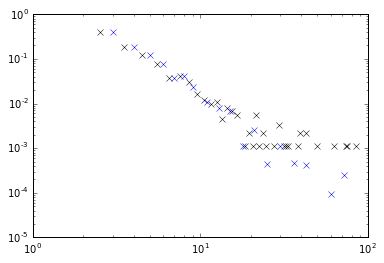

In [76]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

m = 3
N = 900

G = nx.barabasi_albert_graph(N, m)

degree_list=nx.degree(G).values()
print degree_list
kmin=min(degree_list)
kmax=max(degree_list)

bins=[float(k-0.5) for k in range(kmin,kmax+2,1)]
#print bins
density, binedges = np.histogram(degree_list, bins=bins, density=True)
print density
bins = np.delete(bins, -1)

logBins = np.logspace(np.log10(kmin), np.log10(kmax),num=20)
for x in range(len(logBins)):
    logBins[x] = np.ceil(logBins[x])
logBinDensity, binedges = np.histogram(degree_list, bins=logBins, density=True)
logBins = np.delete(logBins, -1)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xscale('log')
ax.set_yscale('log')

plt.plot(bins,density,'x',color='black')
plt.plot(logBins,logBinDensity,'x',color='blue')
plt.show()

binning scheme:
[ 1  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  1  0  0  0  1  0  0  0
  1  0  0  1  0  1  0  1  0  1  0  1  1  0  1  1  1  1  1  1  1  1  1  2  1
  2  1  2  2  2  2  2  2  3  3  3  3  3  3  4  4  4  5  4  5  6  5  6  7  7
  7  8  8  9 10 10 10 12 12 13 14 14 16 16 18 19 20 21 23 24 26 27 29 32]
[ 0.0120117          nan         nan         nan         nan         nan
         nan         nan         nan         nan  0.0237305          nan
         nan         nan         nan         nan         nan  0.0354492
         nan         nan         nan  0.047168           nan         nan
         nan  0.0588867          nan         nan  0.0706055          nan
  0.0823242          nan  0.094043           nan  0.105762           nan
  0.11748     0.129199           nan  0.140918    0.152637    0.164355
  0.176074    0.187793    0.199512    0.21123     0.222949    0.234668
  0.252246    0.269824    0.2874025   0.30498     0.3225585   0.345996
  0.3694335   0.392871    0.4163

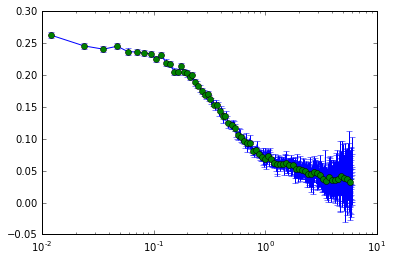

In [175]:
# Good good
def log_binning(x,y,nbins):
    
    x = x[~np.isnan(x)] # remove nan from the data
    y = y[~np.isnan(y)]
    
    max_x = np.log10(max(x))
    min_x = np.log10(min(x))
    bins = np.logspace(min_x,max_x,num=nbins)
    # Based off of: http://stackoverflow.com/questions/6163334/binning-data-in-python-with-scipy-numpy
    bin_no_pts= np.histogram(x, bins)[0] #the no fo data points in every bin
    print "binning scheme:";print bin_no_pts
    bin_means_x = (np.histogram(x,bins,weights=x)[0] / bin_no_pts)
    bin_means_y = (np.histogram(x,bins,weights=y)[0] / bin_no_pts)   
    bin_means_yy = (np.histogram(x,bins,weights=y*y)[0] / bin_no_pts)
    bin_std_y = np.sqrt( bin_means_yy - bin_means_y*bin_means_y)/np.sqrt(bin_no_pts)   

    return bin_means_x,bin_means_y,bin_std_y

newdata=log_binning(data[:,0],data[:,1],100)
print newdata[0],newdata[1],newdata[2]
plt.errorbar(data[:,0],data[:,1], data[:,2])
plt.errorbar(newdata[0],newdata[1], newdata[2],fmt='o')
plt.xscale('log')

C:\Users\kew\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:17: RuntimeWarning: divide by zero encountered in divide
C:\Users\kew\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:18: RuntimeWarning: invalid value encountered in divide


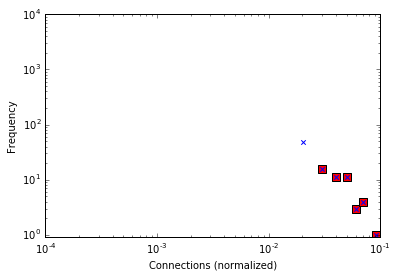

In [85]:
import numpy as np
from collections import Counter
def drop_zeros(a_list):
    return [i for i in a_list if i>0]

def log_binning(counter_dict,bin_count=35):

    max_x = np.log10(max(counter_dict.keys()))
    max_y = np.log10(max(counter_dict.values()))
    max_base = max([max_x,max_y])

    min_x = np.log10(min(drop_zeros(counter_dict.keys())))

    bins = np.logspace(min_x,max_base,num=bin_count)

    # Based off of: http://stackoverflow.com/questions/6163334/binning-data-in-python-with-scipy-numpy
    bin_means_y = (np.histogram(counter_dict.keys(),bins,weights=counter_dict.values())[0] / np.histogram(counter_dict.keys(),bins)[0])
    bin_means_x = (np.histogram(counter_dict.keys(),bins,weights=counter_dict.keys())[0] / np.histogram(counter_dict.keys(),bins)[0])

    return bin_means_x,bin_means_y

import networkx as nx
ba_g = nx.barabasi_albert_graph(100,2)
ba_c = nx.degree_centrality(ba_g)
#print ba_c
# To convert normalized degrees to raw degrees
#ba_c = {k:int(v*(len(ba_g)-1)) for k,v in ba_c.iteritems()}
ba_c2 = dict(Counter(ba_c.values()))
#print ba_c2
ba_x,ba_y = log_binning(ba_c2,60)

plt.xscale('log')
plt.yscale('log')
plt.scatter(ba_x,ba_y,c='r',marker='s',s=50)
plt.scatter(ba_c2.keys(),ba_c2.values(),c='b',marker='x')
plt.xlim((1e-4,1e-1))
plt.ylim((.9,1e4))
plt.xlabel('Connections (normalized)')
plt.ylabel('Frequency')
plt.show()



[  9.84729285e-05   9.96576885e-02   1.99216904e-01   2.98776120e-01
   3.98335335e-01   4.97894551e-01   5.97453766e-01   6.97012982e-01
   7.96572197e-01   8.96131413e-01   9.95690629e-01]
[ 0.09965769  0.1992169   0.29877612  0.39833534  0.49789455  0.59745377
  0.69701298  0.7965722   0.89613141  0.99569063] [  9.84729285e-05   9.96576885e-02   1.99216904e-01   2.98776120e-01
   3.98335335e-01   4.97894551e-01   5.97453766e-01   6.97012982e-01
   7.96572197e-01   8.96131413e-01]


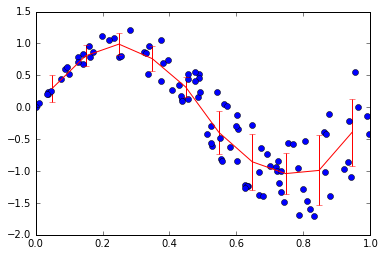

In [86]:
# Good good
import numpy as np
import matplotlib.pyplot as plt

x = np.random.rand(100)
y = np.sin(2*np.pi*x) + 2 * x * (np.random.rand(100)-0.5)
nbins = 10

n, _ = np.histogram(x, bins=nbins)
sy, _ = np.histogram(x, bins=nbins, weights=y)
sy2, _ = np.histogram(x, bins=nbins, weights=y*y)
mean = sy / n
std = np.sqrt(sy2/n - mean*mean)
print _
print _[1:],_[:-1]
plt.plot(x, y, 'bo')
plt.errorbar((_[1:] + _[:-1])/2, mean, yerr=std, fmt='r-')
plt.show()

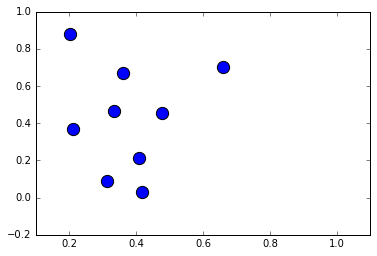

In [118]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import time

x, y = np.random.random((2, 10))

fig, ax = plt.subplots()
scat = ax.scatter(x, y, s=150)
fig.show()
xy = np.delete(scat.get_offsets(), 0, axis=0)
scat.set_offsets(xy)
scat.set_offsets(xy)
plt.draw()
fig.show()
# Show the figure, then remove one point every second.



In [169]:
tst1=np.array([0,1,2,3])
nbins=10
n, _ = np.histogram(tst1, bins=nbins)
print n
print np.histogram(tst1, bins=nbins,weights=tst1)
print np.histogram(tst1, bins=nbins,weights=tst1)[0] / n

[1 0 0 1 0 0 1 0 0 1]
(array([0, 0, 0, 1, 0, 0, 2, 0, 0, 3]), array([ 0. ,  0.3,  0.6,  0.9,  1.2,  1.5,  1.8,  2.1,  2.4,  2.7,  3. ]))
[0 0 0 1 0 0 2 0 0 3]


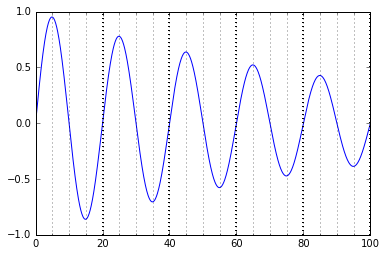

In [121]:
from pylab import *
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

t = arange(0.0, 100.0, 0.1)
s = sin(0.1*pi*t)*exp(-t*0.01)

ax = subplot(111)
plot(t,s)

ax.xaxis.set_major_locator(MultipleLocator(20))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(5))

#ax.yaxis.set_major_locator(MultipleLocator(0.5))
#ax.yaxis.set_minor_locator(MultipleLocator(0.1))

ax.xaxis.grid(True,'minor')
ax.yaxis.grid(True,'minor')

ax.xaxis.grid(True,'major',linewidth=2)
ax.yaxis.grid(True,'major',linewidth=2)

show()

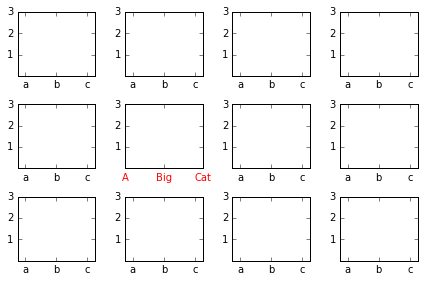

In [122]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=4)

# Set the ticks and ticklabels for all axes
plt.setp(axes, xticks=[0.1, 0.5, 0.9], xticklabels=['a', 'b', 'c'],
        yticks=[1, 2, 3])

# Use the pyplot interface to change just one subplot...
plt.sca(axes[1, 1])
plt.xticks(range(3), ['A', 'Big', 'Cat'], color='red')

fig.tight_layout()
plt.show()

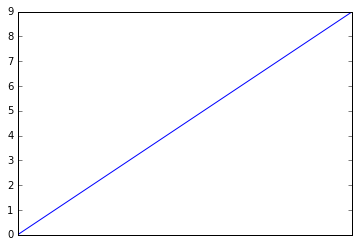

In [127]:
from matplotlib import pyplot as plt
plt.plot(range(10))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') # labels along the bottom edge are off
plt.show()
plt.savefig('plot')
plt.clf()

(100L,) (100L,)
(100L,)


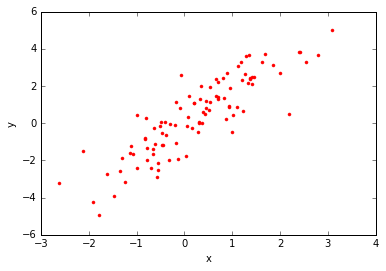

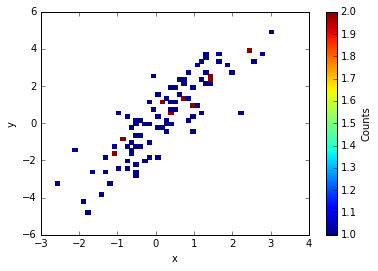

In [7]:
############ 2D histogram ############
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Create some random numbers
n = 100
x = np.random.randn(n)
y = (1.5 * x) + np.random.randn(n)
print x.shape, y.shape
# Plot data
fig1 = plt.figure()
plt.plot(x,y,'.r')
plt.xlabel('x')
plt.ylabel('y')
 
# Estimate the 2D histogram
nbins = 50
wei = np.ones([n])
print wei.shape
H, xedges, yedges = np.histogram2d(x,y,bins=nbins,weights=wei)
 
# H needs to be rotated and flipped
H = np.rot90(H)
H = np.flipud(H)
 
# Mask zeros
Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero
 
# Plot 2D histogram using pcolor
fig2 = plt.figure()
plt.pcolormesh(xedges,yedges,Hmasked)
plt.xlabel('x')
plt.ylabel('y')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Counts')



In [ ]:
'''http://scipy.github.io/old-wiki/pages/Cookbook/Rebinning'''

import numpy as n
import scipy.interpolate
import scipy.ndimage

def congrid(a, newdims, method='linear', centre=False, minusone=False):
    '''Arbitrary resampling of source array to new dimension sizes.
    Currently only supports maintaining the same number of dimensions.
    To use 1-D arrays, first promote them to shape (x,1).
    
    Uses the same parameters and creates the same co-ordinate lookup points
    as IDL''s congrid routine, which apparently originally came from a VAX/VMS
    routine of the same name.

    method:
    neighbour - closest value from original data
    nearest and linear - uses n x 1-D interpolations using
                         scipy.interpolate.interp1d
    (see Numerical Recipes for validity of use of n 1-D interpolations)
    spline - uses ndimage.map_coordinates

    centre:
    True - interpolation points are at the centres of the bins
    False - points are at the front edge of the bin

    minusone:
    For example- inarray.shape = (i,j) & new dimensions = (x,y)
    False - inarray is resampled by factors of (i/x) * (j/y)
    True - inarray is resampled by(i-1)/(x-1) * (j-1)/(y-1)
    This prevents extrapolation one element beyond bounds of input array.
    '''
    if not a.dtype in [n.float64, n.float32]:
        a = n.cast[float](a)
    
    m1 = n.cast[int](minusone)
    ofs = n.cast[int](centre) * 0.5
    old = n.array( a.shape )
    ndims = len( a.shape )
    if len( newdims ) != ndims:
        print "[congrid] dimensions error. " \
              "This routine currently only support " \
              "rebinning to the same number of dimensions."
        return None
    newdims = n.asarray( newdims, dtype=float )    
    dimlist = []

    if method == 'neighbour':
        for i in range( ndims ):
            base = n.indices(newdims)[i]
            dimlist.append( (old[i] - m1) / (newdims[i] - m1) \
                            * (base + ofs) - ofs )
        cd = n.array( dimlist ).round().astype(int)
        newa = a[list( cd )]
        return newa
    
    elif method in ['nearest','linear']:
        # calculate new dims
        for i in range( ndims ):
            base = n.arange( newdims[i] )
            dimlist.append( (old[i] - m1) / (newdims[i] - m1) \
                            * (base + ofs) - ofs )
        # specify old dims
        olddims = [n.arange(i, dtype = n.float) for i in list( a.shape )]

        # first interpolation - for ndims = any
        mint = scipy.interpolate.interp1d( olddims[-1], a, kind=method )
        newa = mint( dimlist[-1] )

        trorder = [ndims - 1] + range( ndims - 1 )
        for i in range( ndims - 2, -1, -1 ):
            newa = newa.transpose( trorder )

            mint = scipy.interpolate.interp1d( olddims[i], newa, kind=method )
            newa = mint( dimlist[i] )

        if ndims > 1:
            # need one more transpose to return to original dimensions
            newa = newa.transpose( trorder )

        return newa
    elif method in ['spline']:
        oslices = [ slice(0,j) for j in old ]
        oldcoords = n.ogrid[oslices]
        nslices = [ slice(0,j) for j in list(newdims) ]
        newcoords = n.mgrid[nslices]

        newcoords_dims = range(n.rank(newcoords))
        #make first index last
        newcoords_dims.append(newcoords_dims.pop(0))
        newcoords_tr = newcoords.transpose(newcoords_dims)
        # makes a view that affects newcoords

        newcoords_tr += ofs        

        deltas = (n.asarray(old) - m1) / (newdims - m1)
        newcoords_tr *= deltas

        newcoords_tr -= ofs

        newa = scipy.ndimage.map_coordinates(a, newcoords)
        return newa
    else:
        print "Congrid error: Unrecognized interpolation type.\n", \
              "Currently only \'neighbour\', \'nearest\',\'linear\',", \
              "and \'spline\' are supported."
        return None 

# Another methods    
def rebin(a, *args):
    '''rebin ndarray data into a smaller ndarray of the same rank whose dimensions
    are factors of the original dimensions. eg. An array with 6 columns and 4 rows
    can be reduced to have 6,3,2 or 1 columns and 4,2 or 1 rows.
    example usages:
    >>> a=rand(6,4); b=rebin(a,3,2)
    >>> a=rand(6); b=rebin(a,2)
    '''
    shape = a.shape
    lenShape = len(shape)
    factor = asarray(shape)/asarray(args)
    evList = ['a.reshape('] + \
             ['args[%d],factor[%d],'%(i,i) for i in range(lenShape)] + \
             [')'] + ['.sum(%d)'%(i+1) for i in range(lenShape)] + \
             ['/factor[%d]'%i for i in range(lenShape)]
    print ''.join(evList)
    return eval(''.join(evList))   

def rebin_factor( a, newshape ):
        '''Rebin an array to a new shape.
        newshape must be a factor of a.shape.
        '''
        assert len(a.shape) == len(newshape)
        assert not sometrue(mod( a.shape, newshape ))

        slices = [ slice(None,None, old/new) for old,new in zip(a.shape,newshape) ]
        return a[slices]
    
def rebin( a, newshape ):
        '''Rebin an array to a new shape.
        '''
        assert len(a.shape) == len(newshape)

        slices = [ slice(0,old, float(old)/new) for old,new in zip(a.shape,newshape) ]
        coordinates = mgrid[slices]
        indices = coordinates.astype('i')   #choose the biggest smaller integer index
        return a[tuple(indices)]
    
def binArray(data, axis, binstep, binsize, func=np.nanmean):
    '''
https://stackoverflow.com/questions/21921178/binning-a-numpy-array/42024730#42024730
data is your array
axis is the axis you want to been
binstep is the number of points between each bin (allow overlapping bins)
binsize is the size of each bin
func is the function you want to apply to the bin (np.max for maxpooling, np.mean for an average ...)
e.g.:
data_matrix = numpy.ndarray((500,500),dtype=float)
binned_data = binArray(data_matrix, 0, 10, 10, np.sum)
binned_data = binArray(binned_data, 1, 10, 10, np.sum)

'''
    
    data = np.array(data)
    dims = np.array(data.shape)
    argdims = np.arange(data.ndim)
    argdims[0], argdims[axis]= argdims[axis], argdims[0]
    data = data.transpose(argdims)
    data = [func(np.take(data,np.arange(int(i*binstep),int(i*binstep+binsize)),0),0) for i in np.arange(dims[axis]//binstep)]
    data = np.array(data).transpose(argdims)
    return data

def submatsum(data,n,m):
    # return a matrix of shape (n,m)
    bs = data.shape[0]//n,data.shape[1]//m  # blocksize averaged over
    return np.reshape(np.array([np.sum(data[k1*bs[0]:(k1+1)*bs[0],k2*bs[1]:(k2+1)*bs[1]]) for k1 in range(n) for k2 in range(m)]),(n,m))

In [6]:
import numpy as np

def submatsum(data,n,m):
    # return a matrix of shape (n,m)
    bs = data.shape[0]//n,data.shape[1]//m  # blocksize averaged over
    return np.reshape(np.array([np.nanmean(data[k1*bs[0]:(k1+1)*bs[0],k2*bs[1]:(k2+1)*bs[1]]) \
                                for k1 in range(n) for k2 in range(m)]),(n,m))
# set up dummy data
N,M = 10,6
data_matrix = np.reshape(np.arange(N*M),(N,M))

# set up size of 2x3-reduced matrix, assume congruity
n,m = N//2,M//1
reduced_matrix = submatsum(data_matrix,n,m)

# check output
print(data_matrix)
print(reduced_matrix)

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]
 [24 25 26 27 28 29]
 [30 31 32 33 34 35]
 [36 37 38 39 40 41]
 [42 43 44 45 46 47]
 [48 49 50 51 52 53]
 [54 55 56 57 58 59]]
[[  3.   4.   5.   6.   7.   8.]
 [ 15.  16.  17.  18.  19.  20.]
 [ 27.  28.  29.  30.  31.  32.]
 [ 39.  40.  41.  42.  43.  44.]
 [ 51.  52.  53.  54.  55.  56.]]


<IPython.core.display.Javascript object>


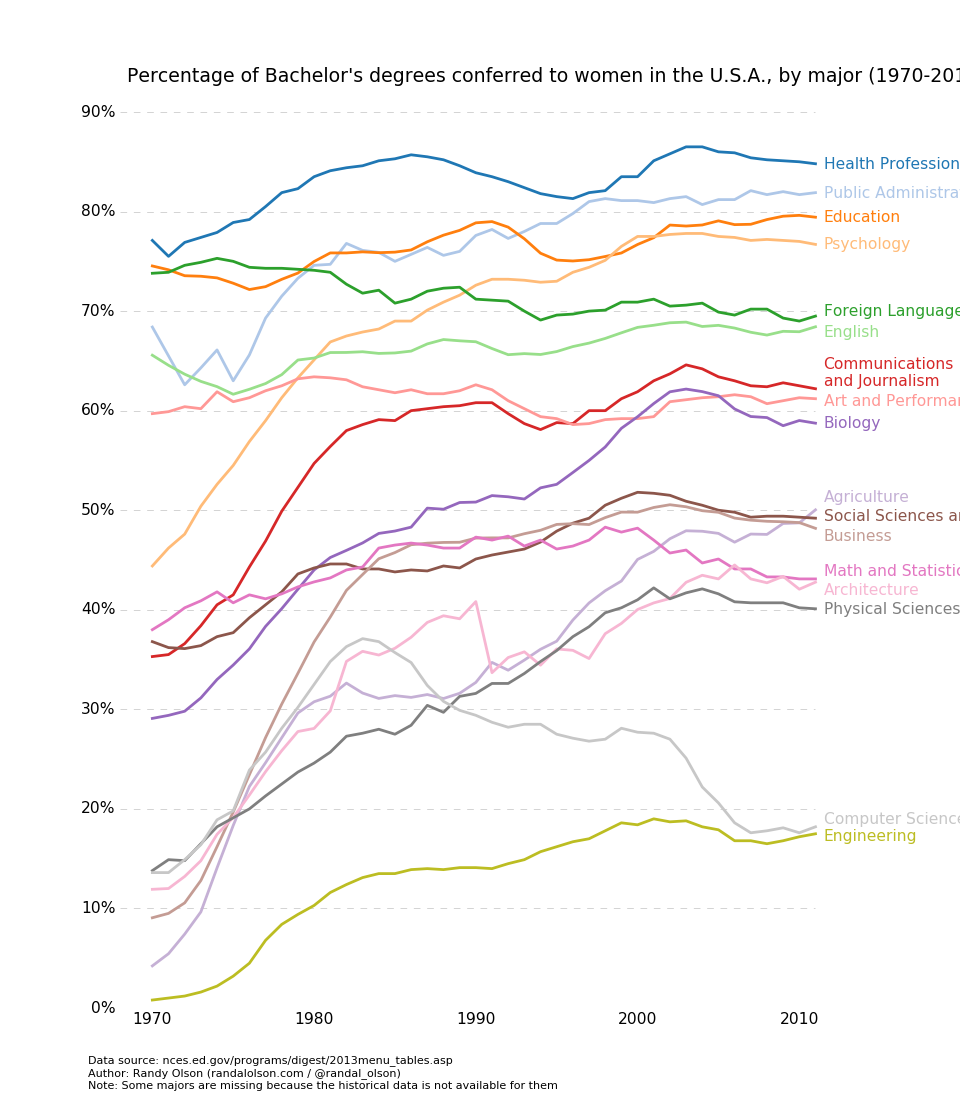

In [3]:
import matplotlib.pyplot as plt  
import pandas as pd  
% matplotlib notebook

# Read the data into a pandas DataFrame.    
gender_degree_data = pd.read_csv("http://www.randalolson.com/wp-content/uploads/percent-bachelors-degrees-women-usa.csv")    

# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    

# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)    

# You typically want your plot to be ~1.33x wider than tall. This plot is a rare    
# exception because of the number of lines being plotted on it.    
# Common sizes: (10, 7.5) and (12, 9)    
plt.figure(figsize=(12, 14))    

# Remove the plot frame lines. They are unnecessary chartjunk.    
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    

# Ensure that the axis ticks only show up on the bottom and left of the plot.    
# Ticks on the right and top of the plot are generally unnecessary chartjunk.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()    

# Limit the range of the plot to only where the data is.    
# Avoid unnecessary whitespace.    
plt.ylim(0, 90)    
plt.xlim(1968, 2014)    

# Make sure your axis ticks are large enough to be easily read.    
# You don't want your viewers squinting to read your plot.    
plt.yticks(range(0, 91, 10), [str(x) + "%" for x in range(0, 91, 10)], fontsize=14)    
plt.xticks(fontsize=14)    

# Provide tick lines across the plot to help your viewers trace along    
# the axis ticks. Make sure that the lines are light and small so they    
# don't obscure the primary data lines.    
for y in range(10, 91, 10):    
    plt.plot(range(1968, 2012), [y] * len(range(1968, 2012)), "--", lw=0.5, color="black", alpha=0.3)    

# Remove the tick marks; they are unnecessary with the tick lines we just plotted.    
plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on")    

# Now that the plot is prepared, it's time to actually plot the data!    
# Note that I plotted the majors in order of the highest % in the final year.    
majors = ['Health Professions', 'Public Administration', 'Education', 'Psychology',    
          'Foreign Languages', 'English', 'Communications\nand Journalism',    
          'Art and Performance', 'Biology', 'Agriculture',    
          'Social Sciences and History', 'Business', 'Math and Statistics',    
          'Architecture', 'Physical Sciences', 'Computer Science',    
          'Engineering']    

for rank, column in enumerate(majors):    
    # Plot each line separately with its own color, using the Tableau 20    
    # color set in order.    
    plt.plot(gender_degree_data.Year.values,    
            gender_degree_data[column.replace("\n", " ")].values,    
            lw=2.5, color=tableau20[rank])    

    # Add a text label to the right end of every line. Most of the code below    
    # is adding specific offsets y position because some labels overlapped.    
    y_pos = gender_degree_data[column.replace("\n", " ")].values[-1] - 0.5    
    if column == "Foreign Languages":    
        y_pos += 0.5    
    elif column == "English":    
        y_pos -= 0.5    
    elif column == "Communications\nand Journalism":    
        y_pos += 0.75    
    elif column == "Art and Performance":    
        y_pos -= 0.25    
    elif column == "Agriculture":    
        y_pos += 1.25    
    elif column == "Social Sciences and History":    
        y_pos += 0.25    
    elif column == "Business":    
        y_pos -= 0.75    
    elif column == "Math and Statistics":    
        y_pos += 0.75    
    elif column == "Architecture":    
        y_pos -= 0.75    
    elif column == "Computer Science":    
        y_pos += 0.75    
    elif column == "Engineering":    
        y_pos -= 0.25    

    # Again, make sure that all labels are large enough to be easily read    
    # by the viewer.    
    plt.text(2011.5, y_pos, column, fontsize=14, color=tableau20[rank])    

# matplotlib's title() call centers the title on the plot, but not the graph,    
# so I used the text() call to customize where the title goes.    

# Make the title big enough so it spans the entire plot, but don't make it    
# so big that it requires two lines to show.    

# Note that if the title is descriptive enough, it is unnecessary to include    
# axis labels; they are self-evident, in this plot's case.    
plt.text(1995, 93, "Percentage of Bachelor's degrees conferred to women in the U.S.A."    
       ", by major (1970-2012)", fontsize=17, ha="center")    

# Always include your data source(s) and copyright notice! And for your    
# data sources, tell your viewers exactly where the data came from,    
# preferably with a direct link to the data. Just telling your viewers    
# that you used data from the "U.S. Census Bureau" is completely useless:    
# the U.S. Census Bureau provides all kinds of data, so how are your    
# viewers supposed to know which data set you used?    
plt.text(1966, -8, "Data source: nces.ed.gov/programs/digest/2013menu_tables.asp"    
       "\nAuthor: Randy Olson (randalolson.com / @randal_olson)"    
       "\nNote: Some majors are missing because the historical data "    
       "is not available for them", fontsize=10)    

# Finally, save the figure as a PNG.    
# You can also save it as a PDF, JPEG, etc.    
# Just change the file extension in this call.    
# bbox_inches="tight" removes all the extra whitespace on the edges of your plot.    
plt.savefig("percent-bachelors-degrees-women-usa.png", bbox_inches="tight")  



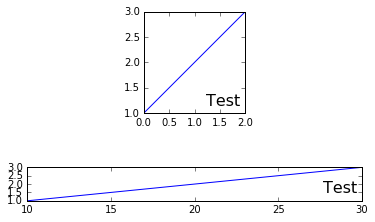

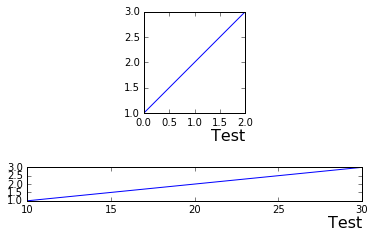

In [132]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, subplot_kw=dict(aspect=1))

axes[0].plot(range(1, 4))
axes[1].plot(range(10, 40, 10), range(1, 4))

for ax in axes:
    ax.annotate('Test', xy=(1, 0), xycoords='axes fraction', fontsize=16,
                xytext=(-5, 5), textcoords='offset points',
                ha='right', va='bottom')
plt.show()

import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, subplot_kw=dict(aspect=1))

axes[0].plot(range(1, 4))
axes[1].plot(range(10, 40, 10), range(1, 4))

for ax in axes:
    ax.annotate('Test', xy=(1, 0), xycoords='axes fraction', fontsize=16,
                xytext=(0, -15), textcoords='offset points',
                ha='right', va='top')
plt.show()

In [141]:
data = range(1,10);
fig = figure()
for i in range(6):
    ax = fig.add_subplot(2,3,i)

    ax.text(.5,.9,'centered title',
        horizontalalignment='center',
        transform=ax.transAxes)

    ax.plot(data)
show()

ValueError: num must be 1 <= num <= 6, not 0

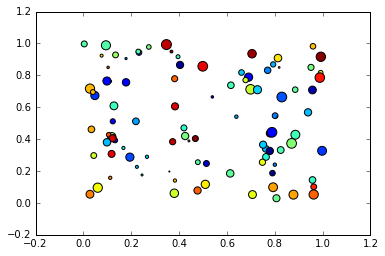

In [140]:
from matplotlib.pyplot import figure, show
import numpy as npy
from numpy.random import rand

if 1: # picking on a scatter plot (matplotlib.collections.RegularPolyCollection)

    x, y, c, s = rand(4, 100)
    def onpick3(event):
        ind = event.ind
        print 'onpick3 scatter:', ind, npy.take(x, ind), npy.take(y, ind)

    fig = figure()
    ax1 = fig.add_subplot(111)
    col = ax1.scatter(x, y, 100*s, c, picker=True)
    #fig.savefig('pscoll.eps')
    fig.canvas.mpl_connect('pick_event', onpick3)

show()

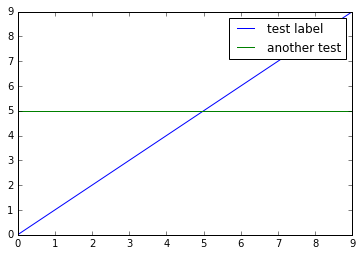

In [144]:
%matplotlib qt
plot(range(10), range(10), label="test label")
plot(range(10), [5 for x in range(10)], label="another test")
l = legend()
l.draggable(True)

In [145]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import plotly.plotly as py

py.sign_in('DemoAccount', 'lr1c37zw81')

n = 50
x, y, z, s, ew = np.random.rand(5, n)
c, ec = np.random.rand(2, n, 4)
area_scale, width_scale = 500, 5

fig, ax = plt.subplots()
sc = ax.scatter(x, y, c=c,
                s=np.square(s)*area_scale,
                edgecolor=ec,
                linewidth=ew*width_scale)
ax.grid()

plot_url = py.plot_mpl(fig)

PlotlyError: Uh oh, an error occurred on the server. 

In [152]:
 np.histogram([1, 2,3,4], bins=5)

(array([1, 1, 0, 1, 1], dtype=int64),
 array([ 1. ,  1.6,  2.2,  2.8,  3.4,  4. ]))